# (R) ggplot a

aes, facet_, geom_, mapping, filter

In [49]:
library('tidyverse')
library('maps') # 위도, 경도 가져오는 library

## aes안의 option

- color

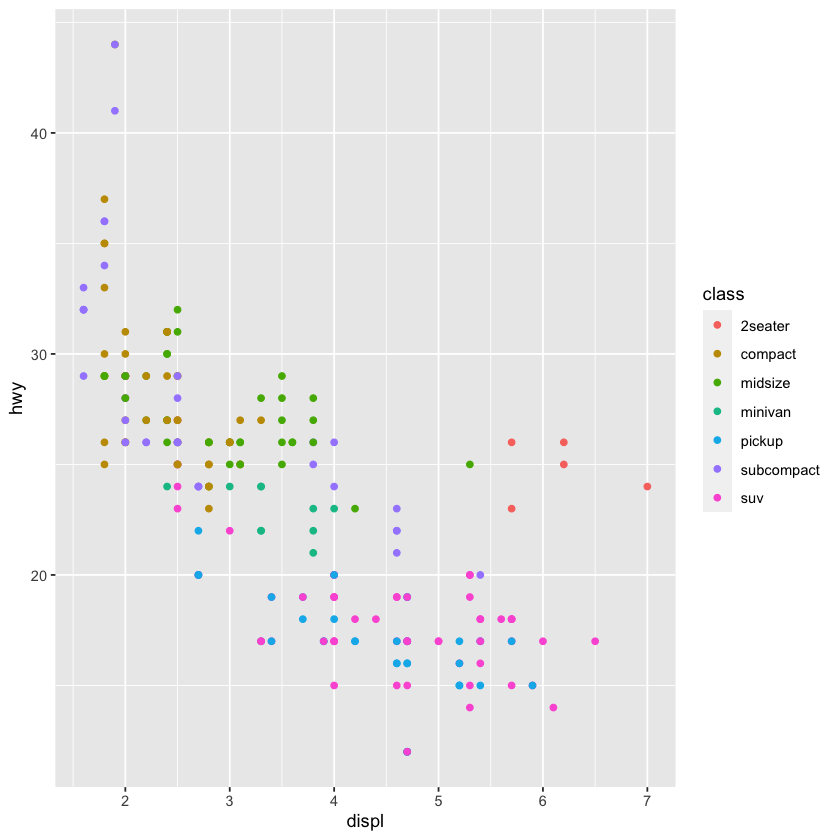

In [3]:
ggplot(data = mpg) + geom_point(mapping = aes(x= displ, y= hwy, color = class))

- size

Warning message:
“Using size for a discrete variable is not advised.”


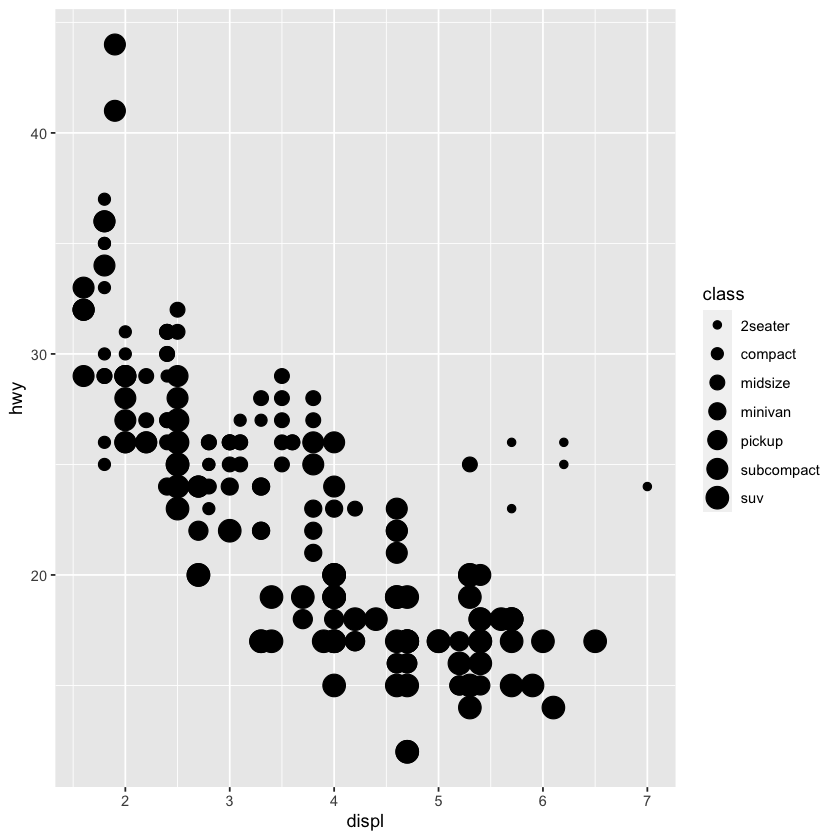

In [4]:
ggplot(data = mpg) + geom_point(mapping = aes(x= displ, y= hwy, size = class))

- alpha

Warning message:
“Using alpha for a discrete variable is not advised.”


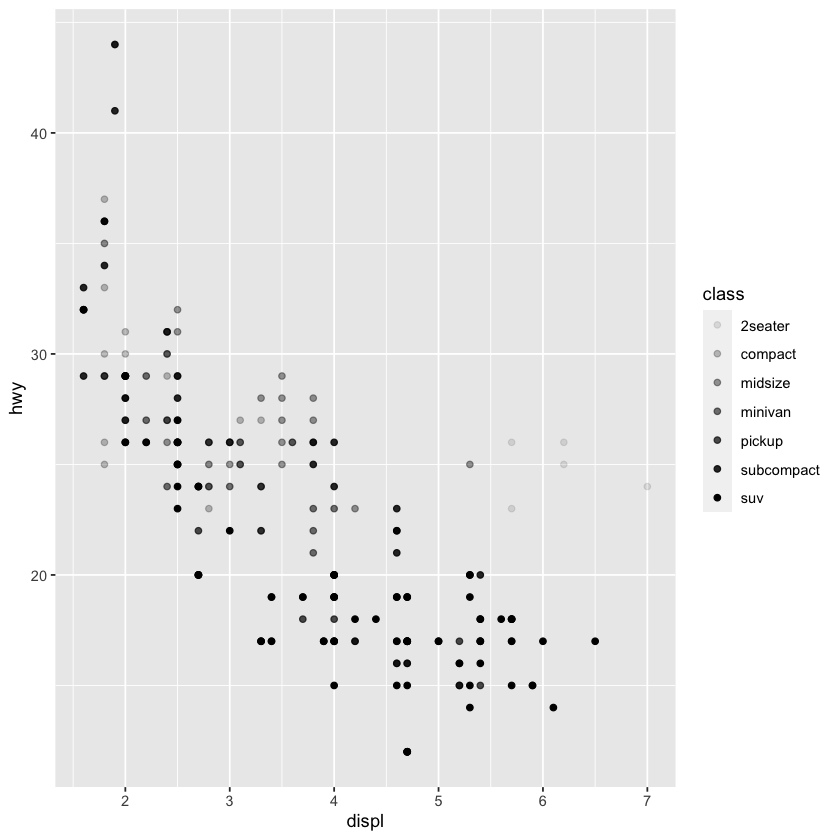

In [5]:
ggplot(data = mpg) + 
geom_point(mapping = aes(x= displ, y = hwy, alpha = class))

- shape

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”


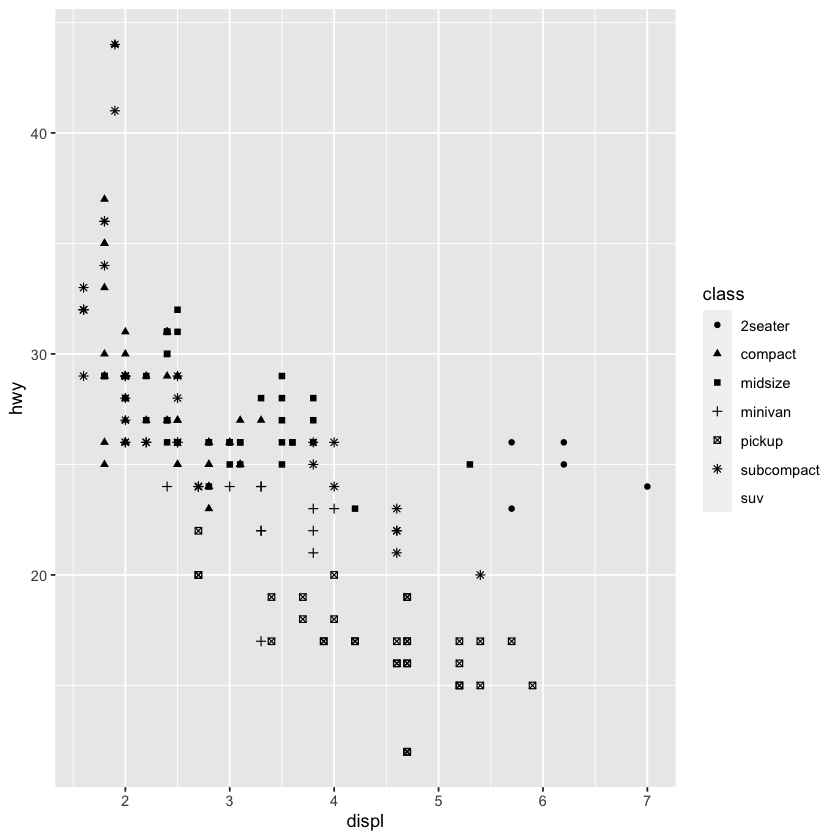

In [6]:
ggplot(data = mpg) + 
geom_point(mapping = aes(x= displ, y = hwy, shape = class))

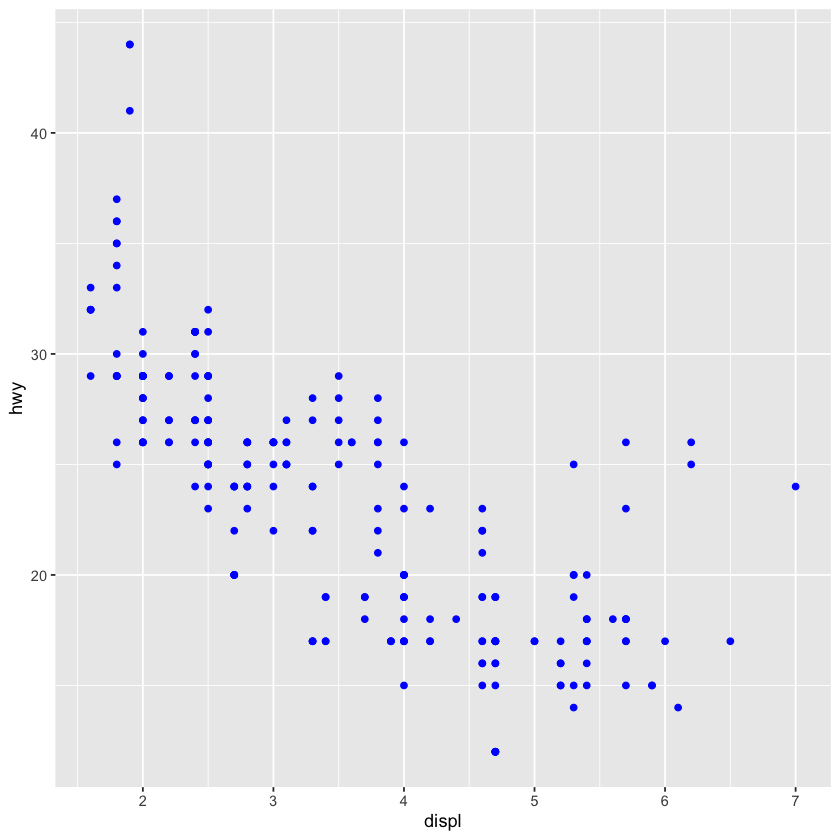

In [7]:
ggplot(data = mpg) +
geom_point(mapping = aes(x= displ, y= hwy), color = 'blue')

## 한번에 여러개 보이기

### facet_wrap

`-` 차 종류(class)에 따라 나눈 모습<br> 
nrow = 줄 개수

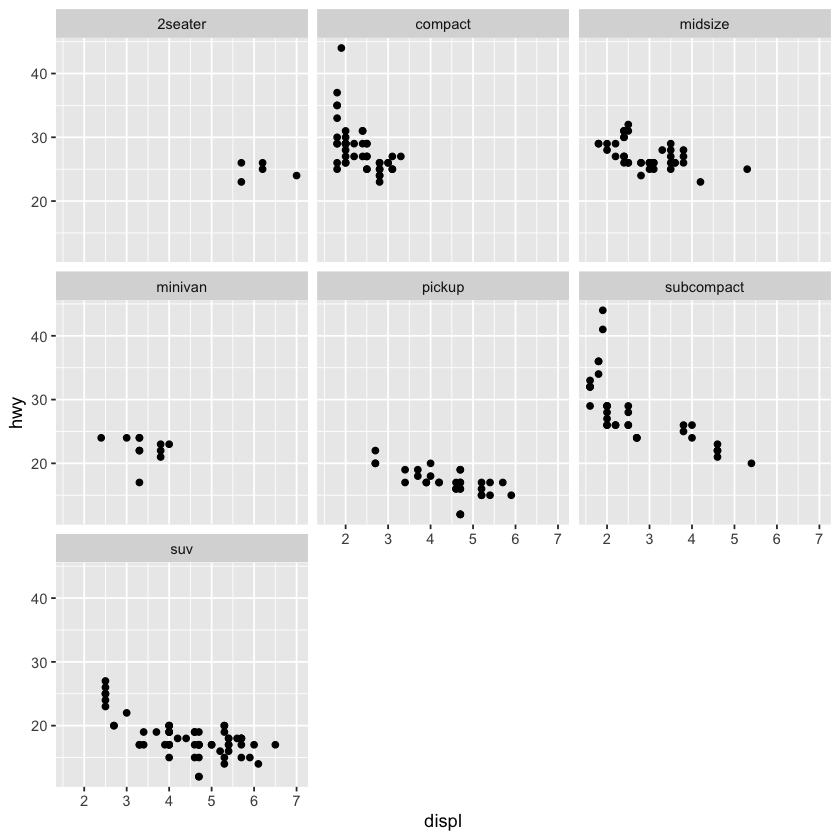

In [8]:
ggplot(data = mpg) +
geom_point(mapping = aes(x=displ, y=hwy)) +
facet_wrap(~ class, nrow = 3)

### facet_grid

- facet grid에 적은 항목들의 결과 plot 보여줌.

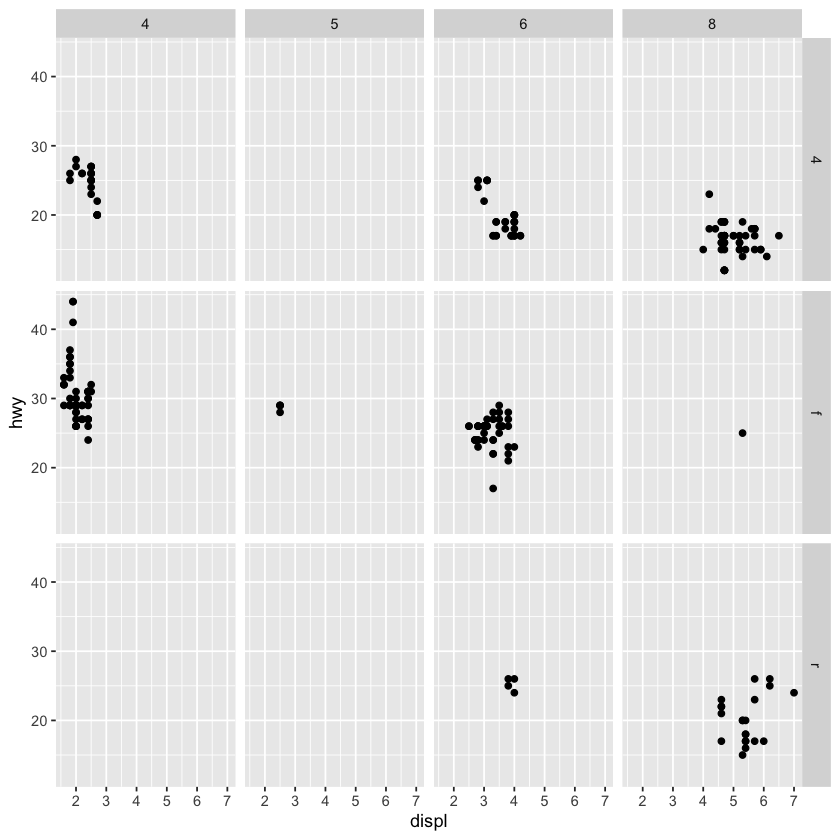

In [9]:
ggplot(data = mpg) +
geom_point(mapping = aes(x= displ, y= hwy)) +
facet_grid(drv ~ cyl)

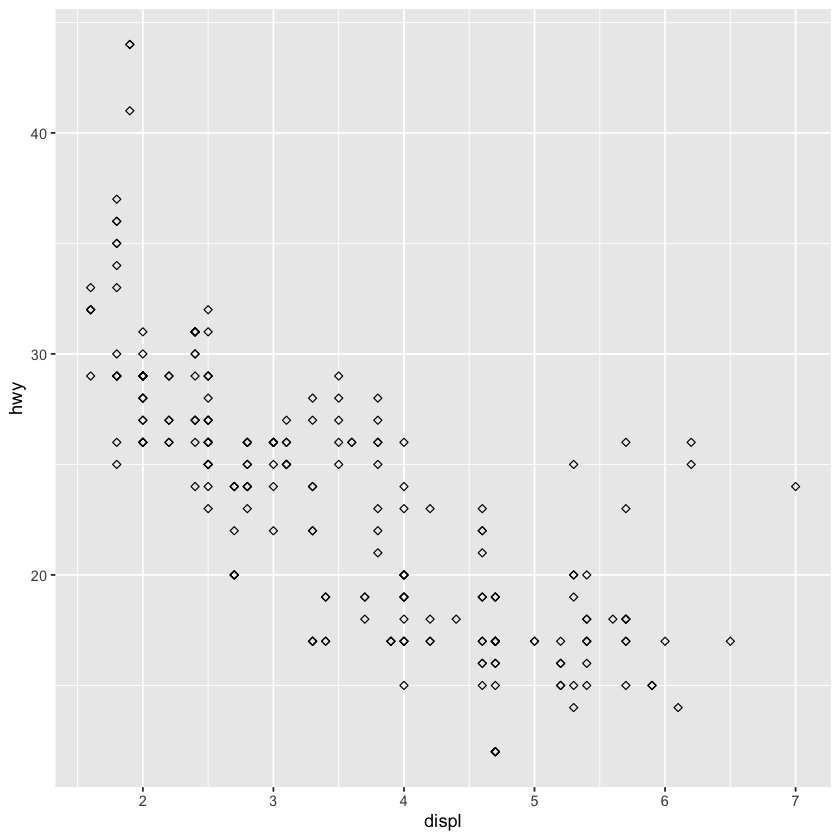

In [10]:
ggplot(data = mpg) +
geom_point(mapping = aes(x= displ, y= hwy),shape =23)

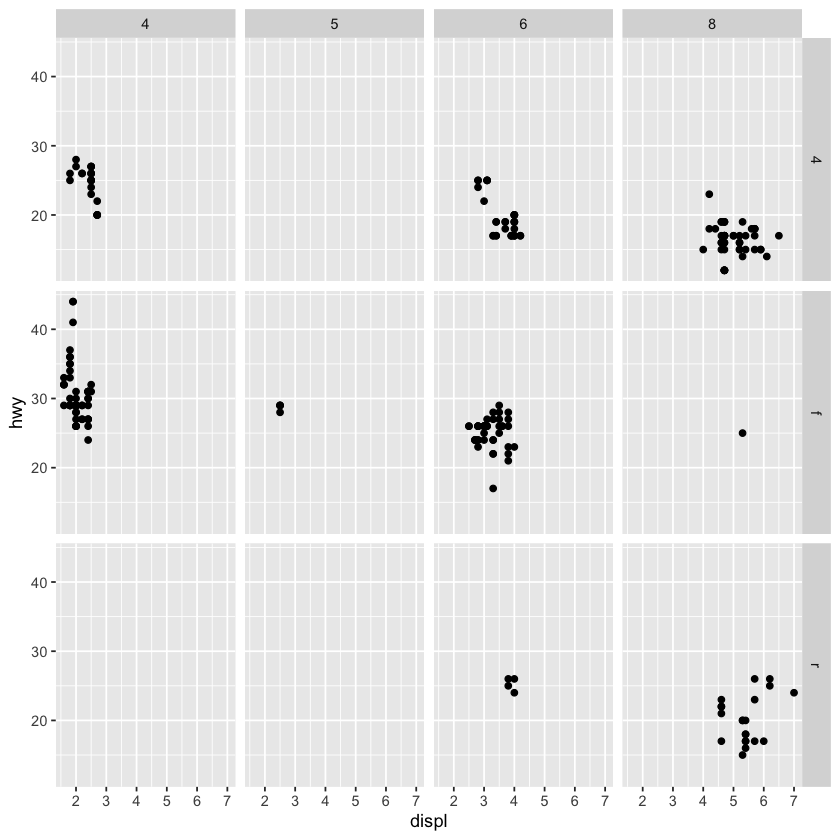

In [11]:
ggplot(data = mpg) +
geom_point(mapping = aes(x= displ, y =hwy)) +
facet_grid(drv ~ cyl)

In [12]:
mpg %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [13]:
mpg$drv %>% unique()

[1] "f" "4" "r"

In [14]:
mpg$cyl %>% unique()

[1] 4 6 8 5

- 열이나 행으로 면분할 하고싶지 않다면 변수이름 대신 `.` 사용<br>
아래는 cyl에 대한 내용만 나온 모습

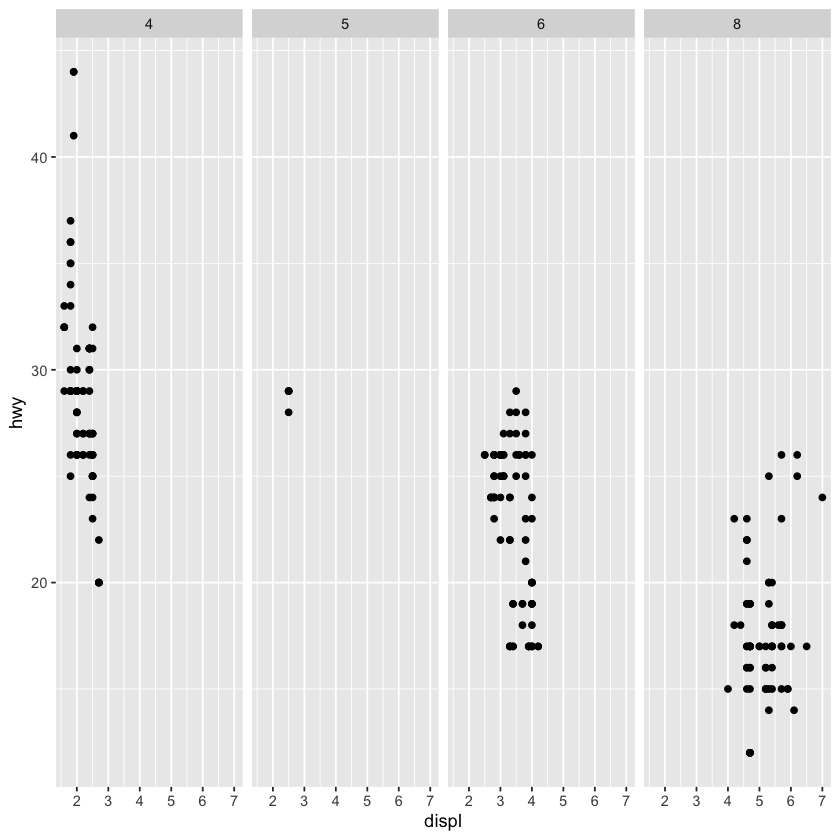

In [15]:
ggplot(data = mpg) +
geom_point(mapping = aes(x= displ, y =hwy)) +
facet_grid(. ~ cyl)

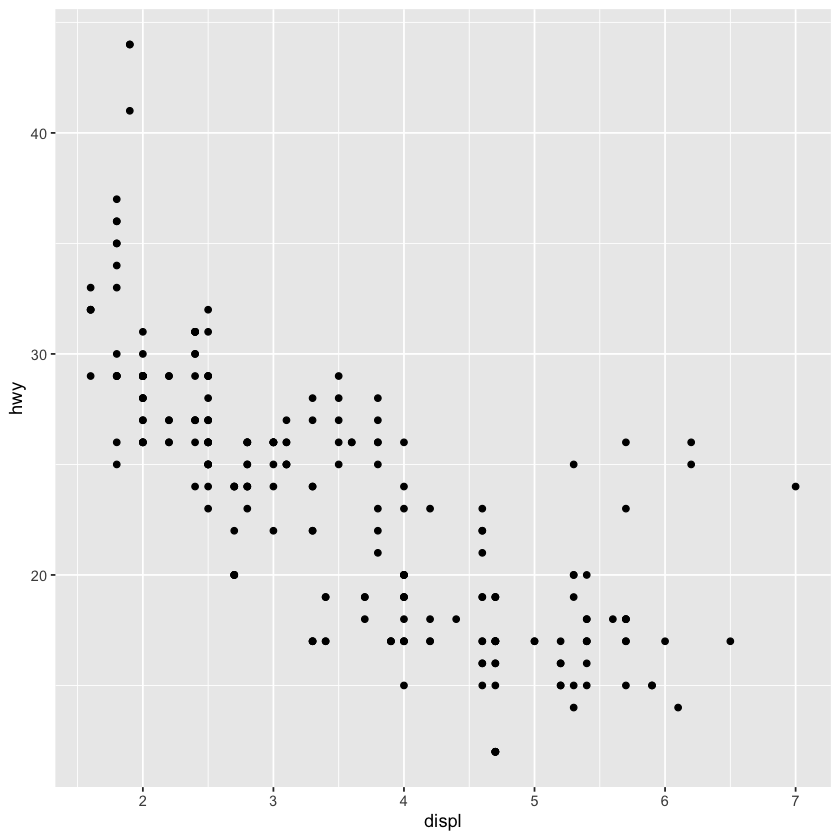

In [16]:
ggplot(data = mpg) +
geom_point(mapping = aes(x= displ, y = hwy))

## geom_옵션들

### geom_smooth

- 데이터에 적합된 평활선

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



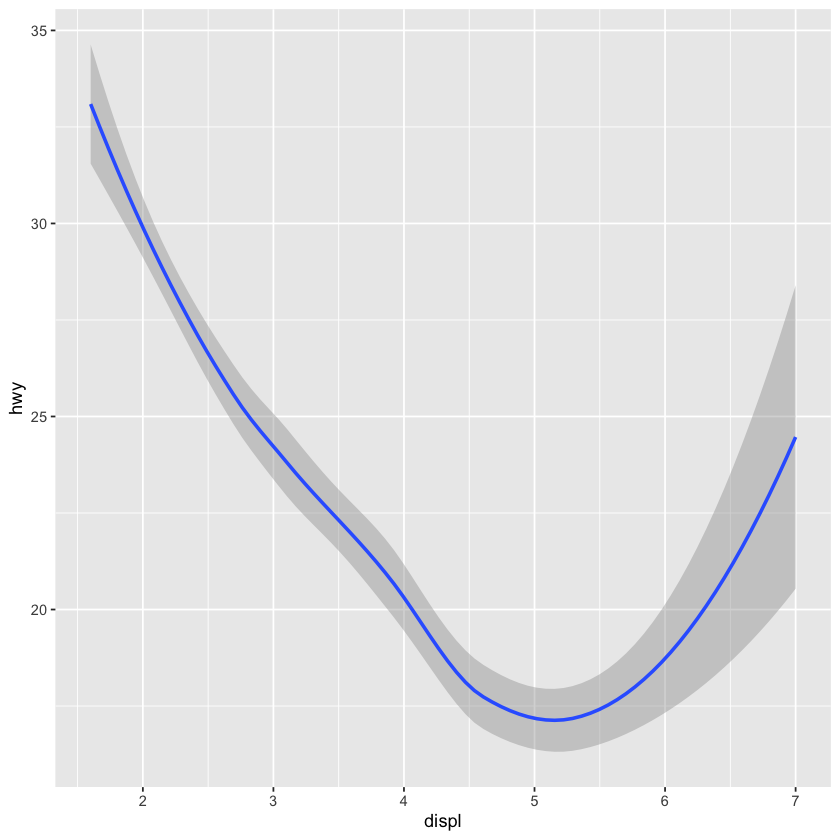

In [17]:
ggplot(data = mpg) +
geom_smooth(mapping = aes(x = displ, y = hwy))

- line자체의 shape은 선택 불가지만, line type은 선택 해줄 수 있음.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



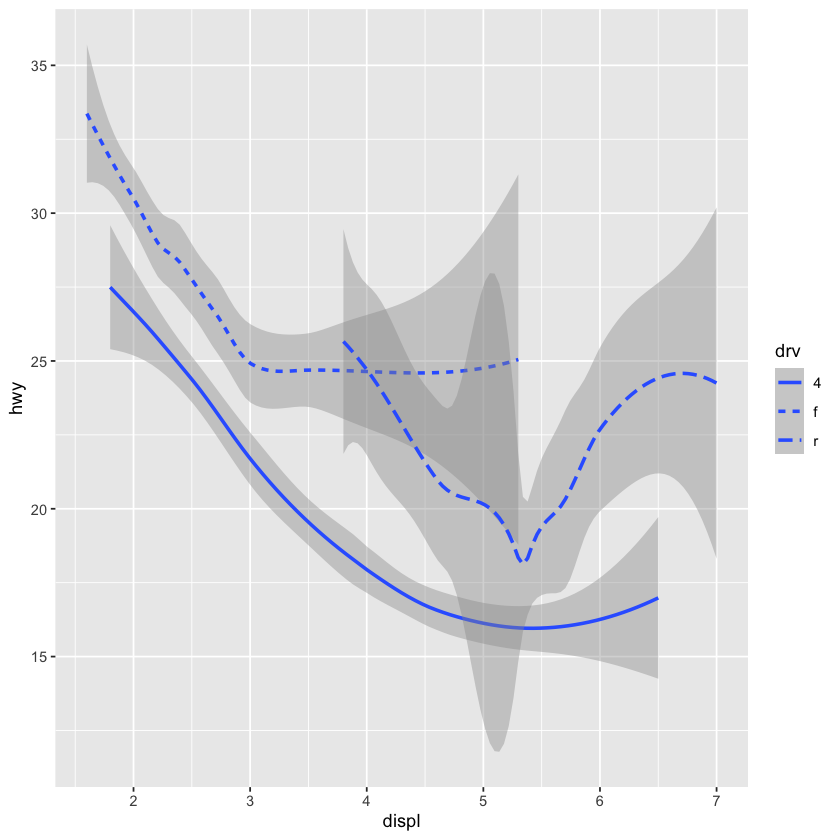

In [18]:
ggplot(data = mpg) +
geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))

`-` 오히려 구별 잘 안되는 듯

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



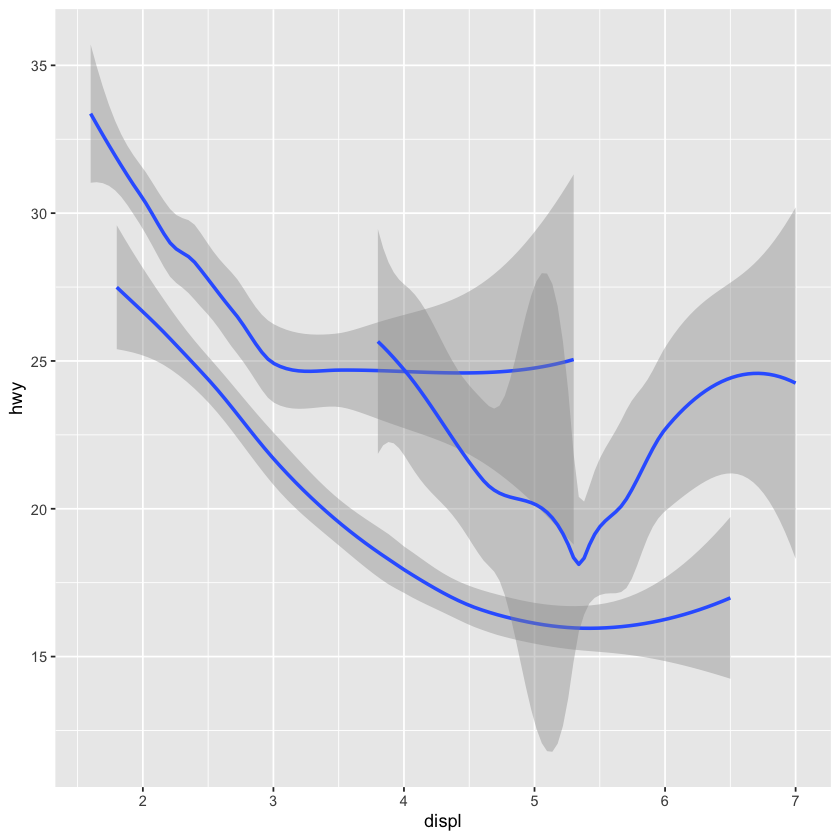

In [19]:
ggplot(data = mpg)+
geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))

- 색깔 입히기 가능

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



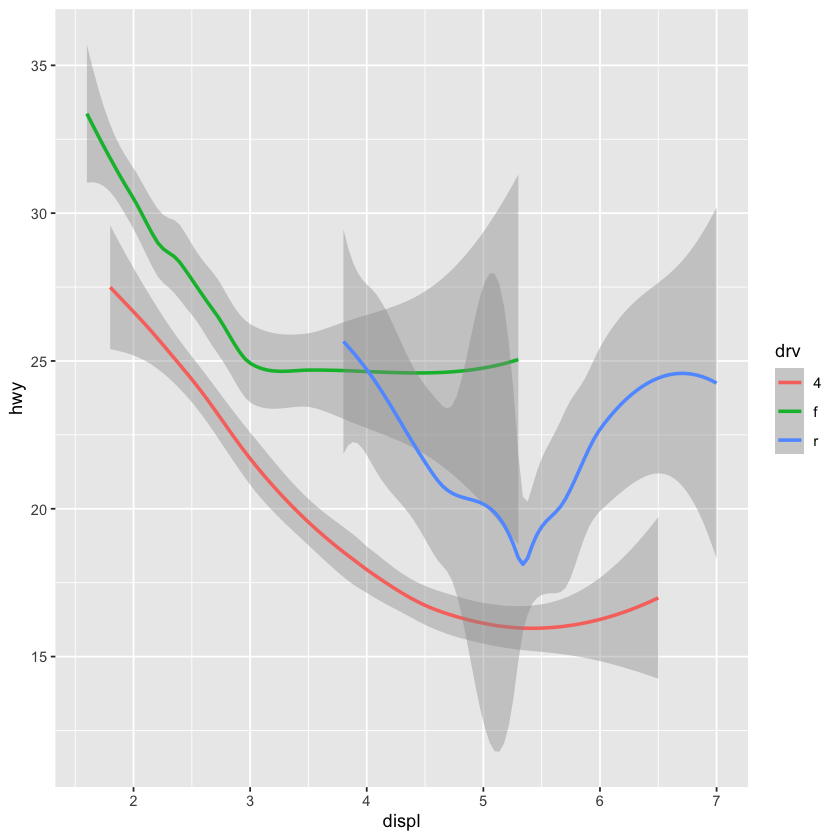

In [20]:
ggplot(data = mpg)+
geom_smooth(mapping = aes(x = displ, y = hwy, color = drv))

`-` 위에 나온 옵션 다 합쳐서 그리기

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



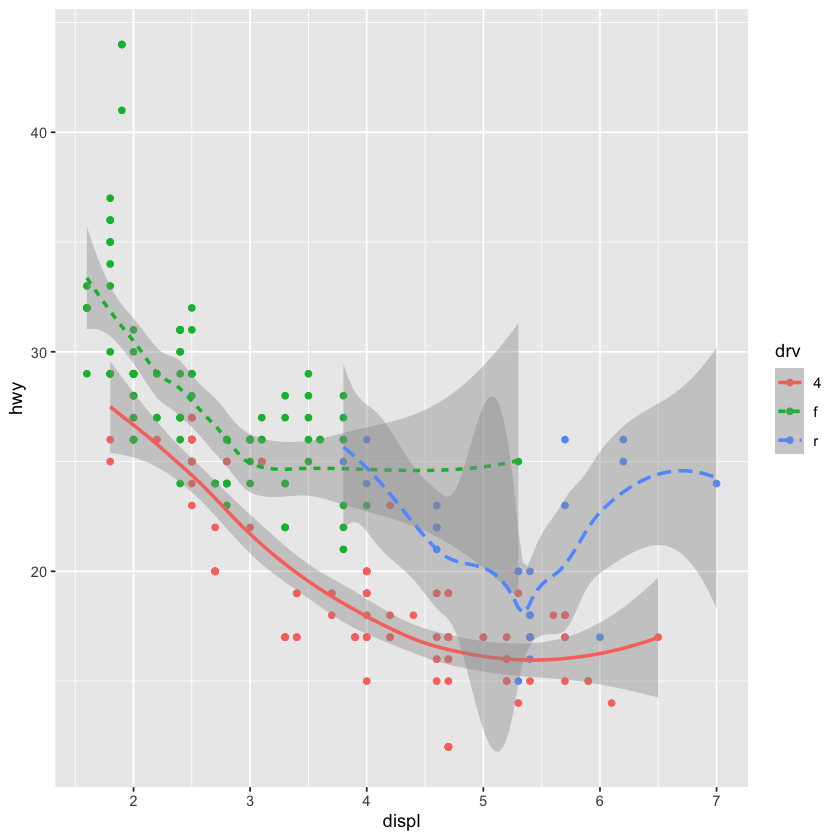

In [21]:
ggplot(data = mpg)+ geom_point(mapping = aes(x = displ, y = hwy, color = drv))+
geom_smooth(mapping = aes(x = displ, y = hwy, color = drv, linetype = drv))

### geom_bar

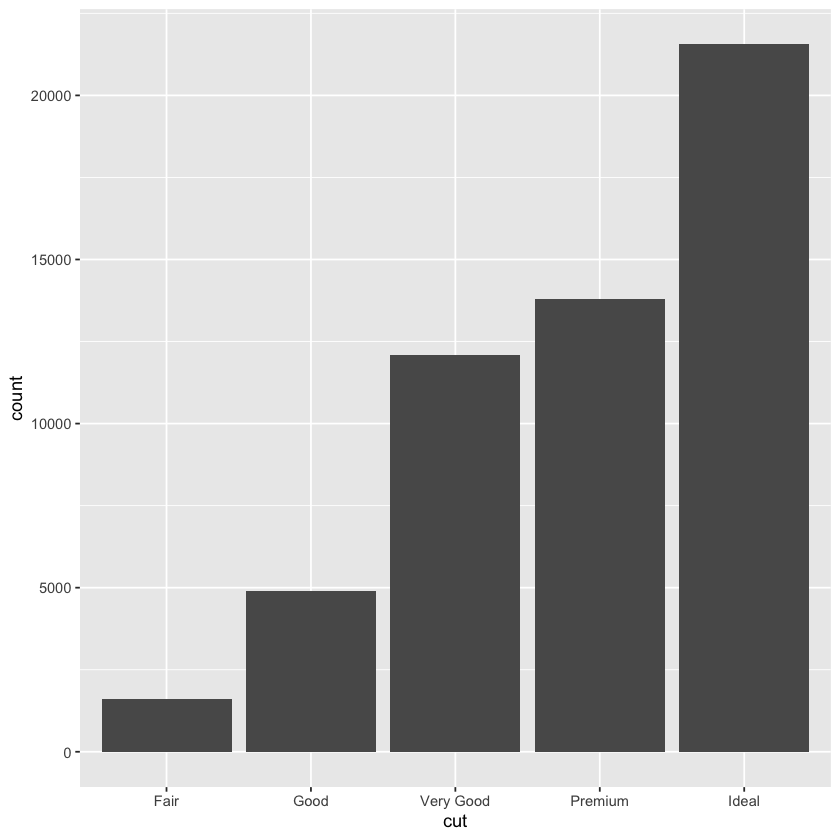

In [22]:
ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut))

## mapping

- ggplot안에 `mapping` 해 놓으면 뒤에서 또 x = ~ 이런 거 안 써도 됨.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



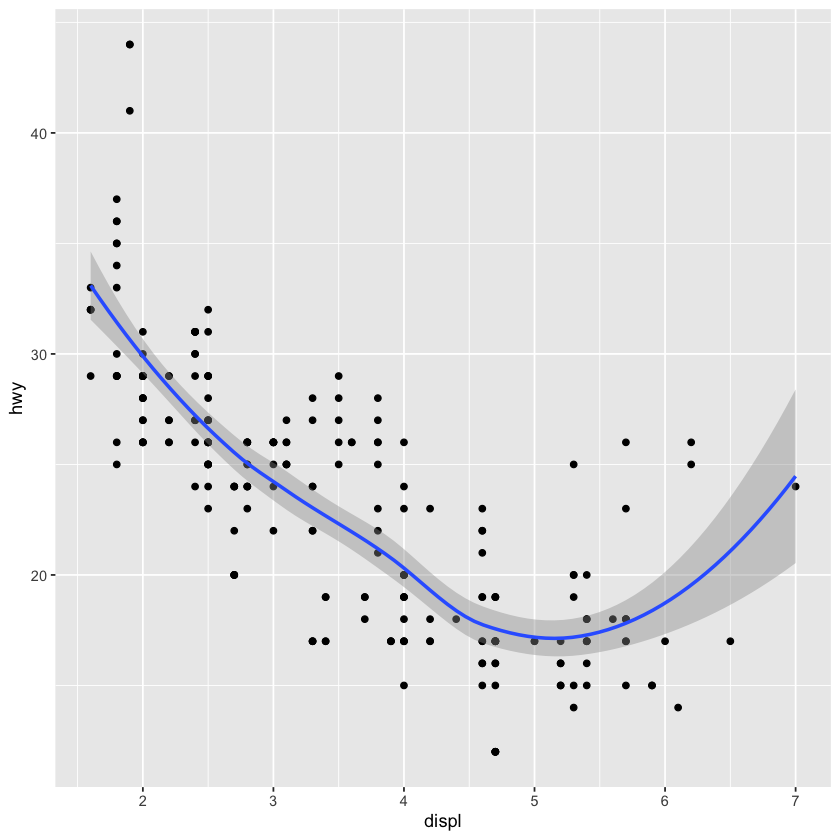

In [23]:
ggplot(data = mpg, mapping = aes(x= displ, y=hwy)) +
geom_point() +
geom_smooth()

- `mapping` 해 놓고 옵션추가 하고 싶다면 해당 `geom`에 가서 그 부분만 `mapping`하고 옵션주면 된다.<br>
나머지는 그대로 작동

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



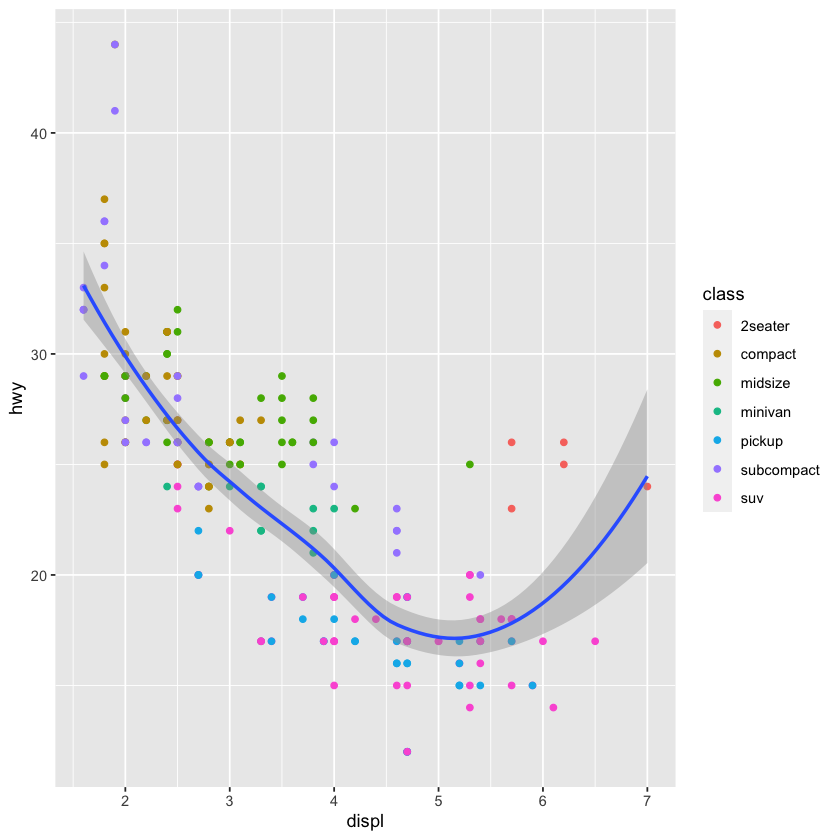

In [24]:
ggplot(data = mpg, mapping = aes(x= displ, y=hwy)) +
geom_point(mapping = aes(color = class)) +
geom_smooth()

## filter

- 특정 항목에 한해서만 `smooth` 하기위해 `filter` 사용<br>
`se = FALSE`하면 그림자 꺼짐

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



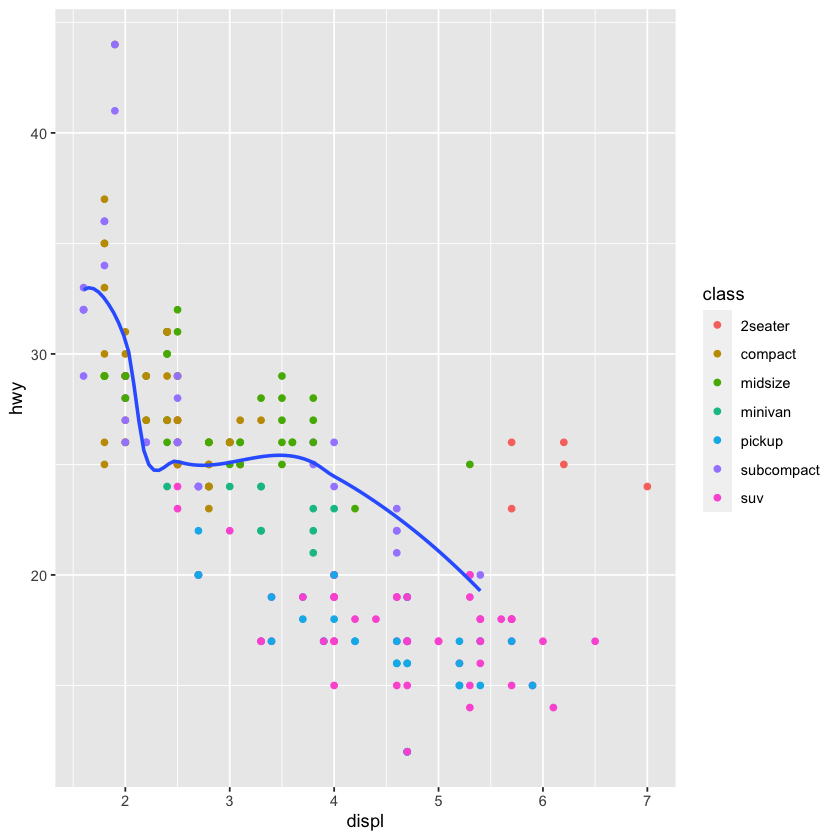

In [25]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
geom_point(mapping = aes(color = class)) +
geom_smooth(
data = filter(mpg, class == 'subcompact'),
    se = FALSE
    )

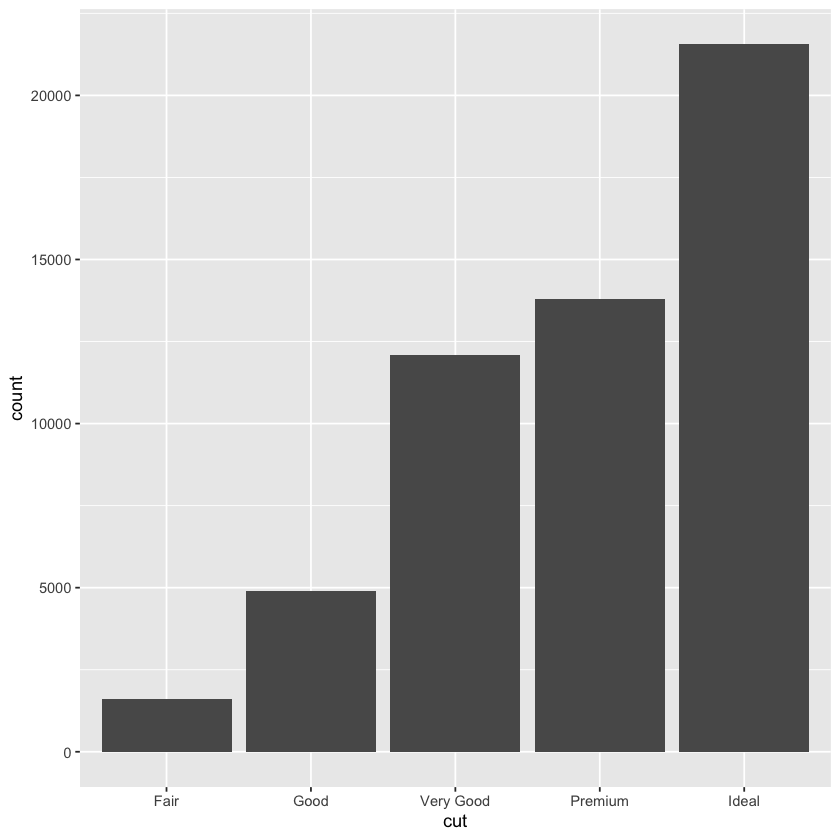

In [26]:
ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut))

- `geom_bar`와 똑같이 나옴

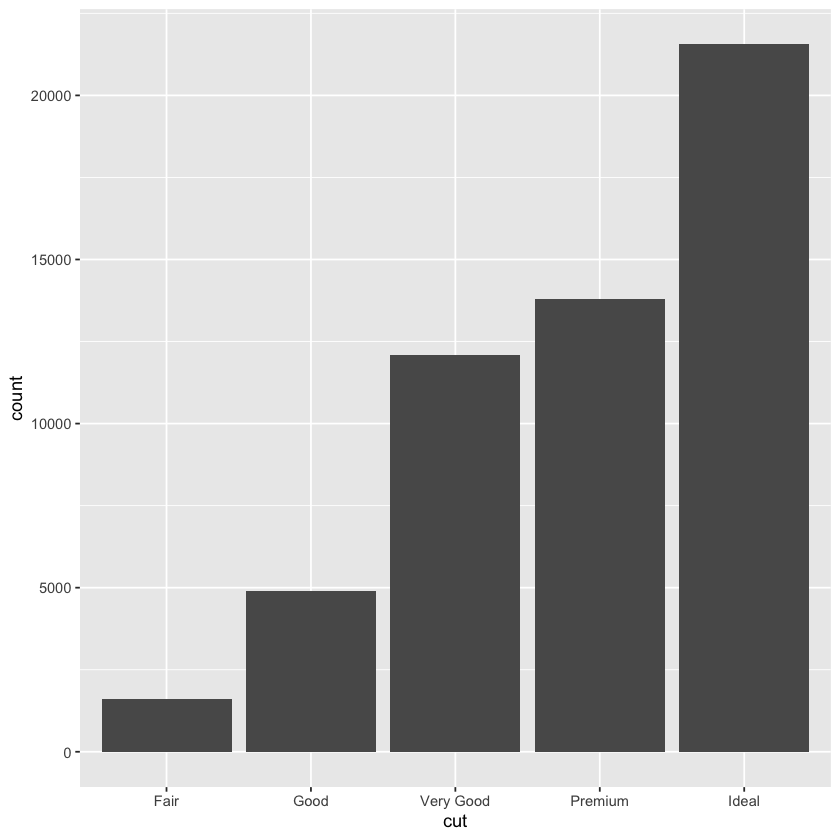

In [27]:
ggplot(data = diamonds)+
stat_count(mapping = aes(x = cut))

- 이것을 보면 `geom_bar`의 y축의 default값이 `stat_count`임을 알 수 있다<br>
이 stat을 다른 값을 주면 y축 종류를 바꿀 수 있음

`-` 다이아 예제를 위한 데이터 셋

In [28]:
demo <- tribble(
    ~cut, ~freq,
    "Fair", 1610,
    "Good", 4906,
    "Very Good", 12082,
    "Premium", 13791,
    "Ideal", 21551
    )

demo

cut,freq
<chr>,<dbl>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


`-` 위의 데이터 셋에 `geom_bar`를 사용, 언급한대로 `stat`을 다른 값을 주니 y축이 count에서 frequncy로 바뀜.

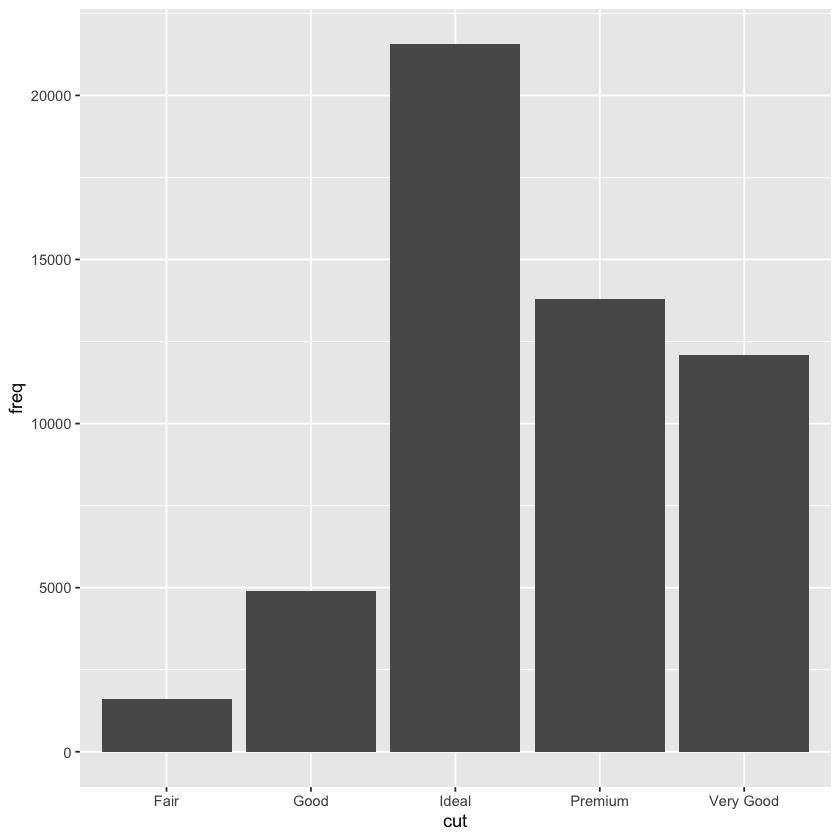

In [29]:
ggplot(data = demo) +
geom_bar(mapping = aes(x = cut, y = freq), stat = 'identity')

- `prop` : 비율로 표시하기

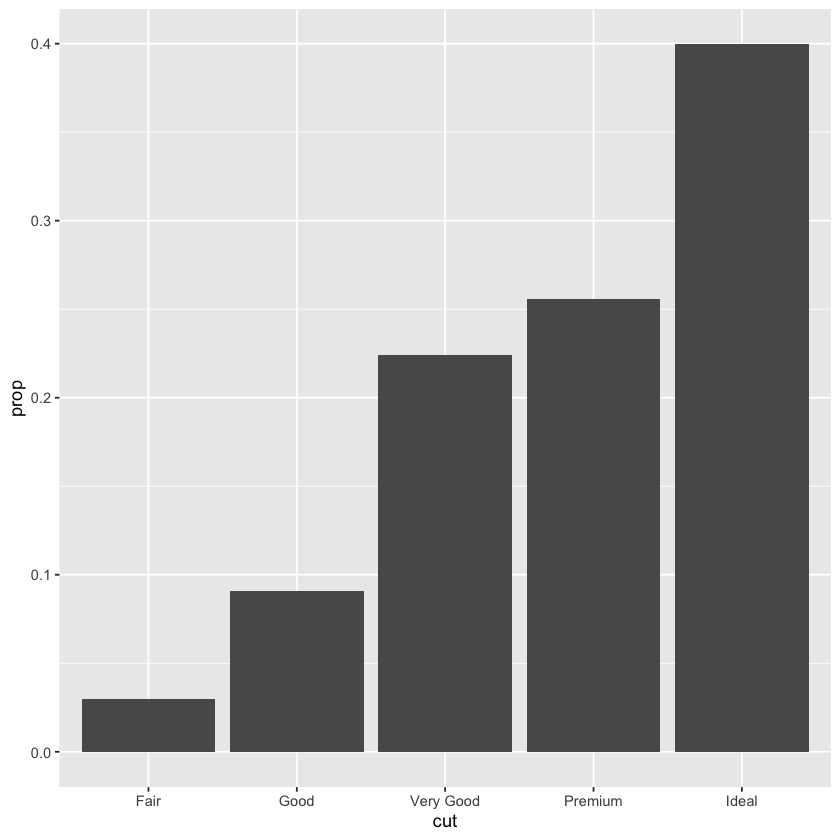

In [30]:
ggplot(data = diamonds) +
geom_bar(
    mapping = aes(x = cut, y = stat(prop), group = 1)
    )

- `stat_summary`

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


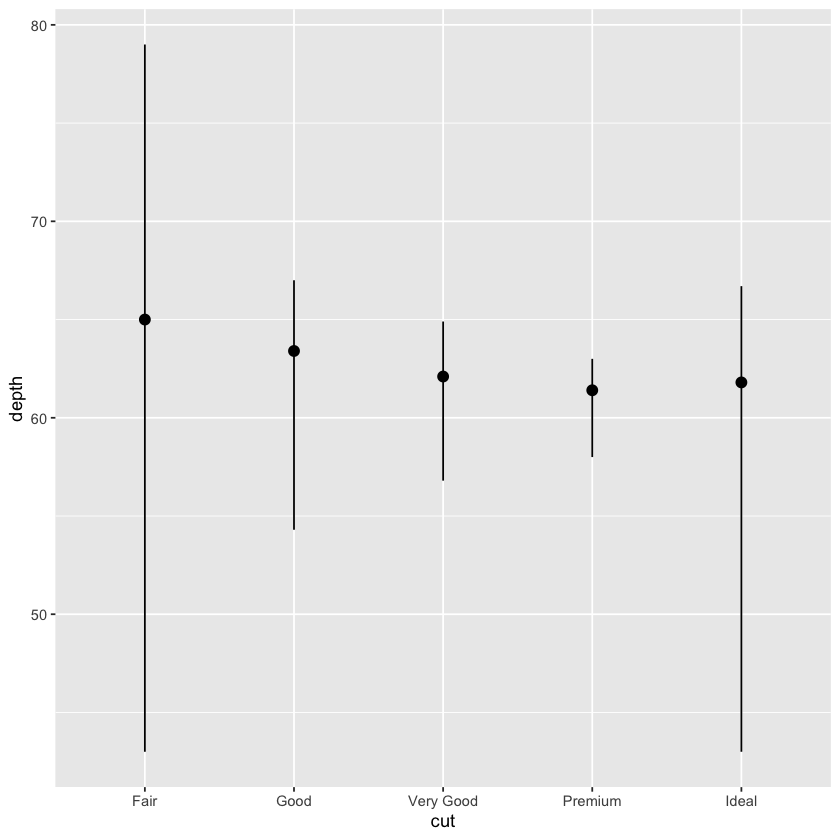

In [31]:
ggplot(data = diamonds) +
stat_summary(
    mapping = aes(x = cut, y = depth),
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
    )

`geom_bar`에서 `color` 사용시 막대그래프의 테두리 색 선택<br>
`geom_bar`에서 `fill` 사용시 막대그래프 자체 색 선택  

### fill(aes 옵션)

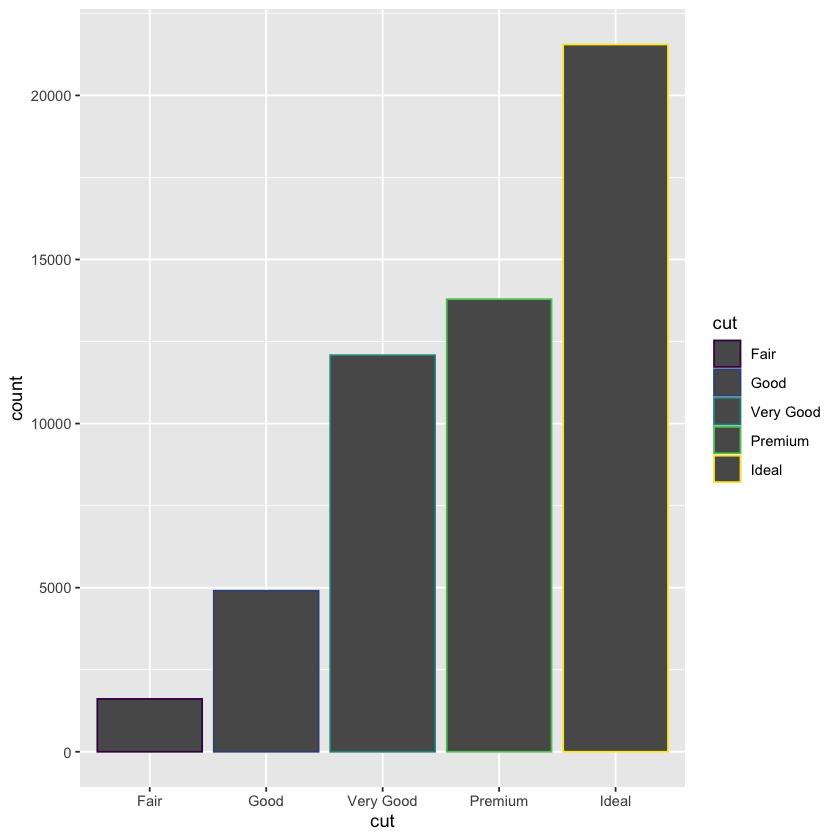

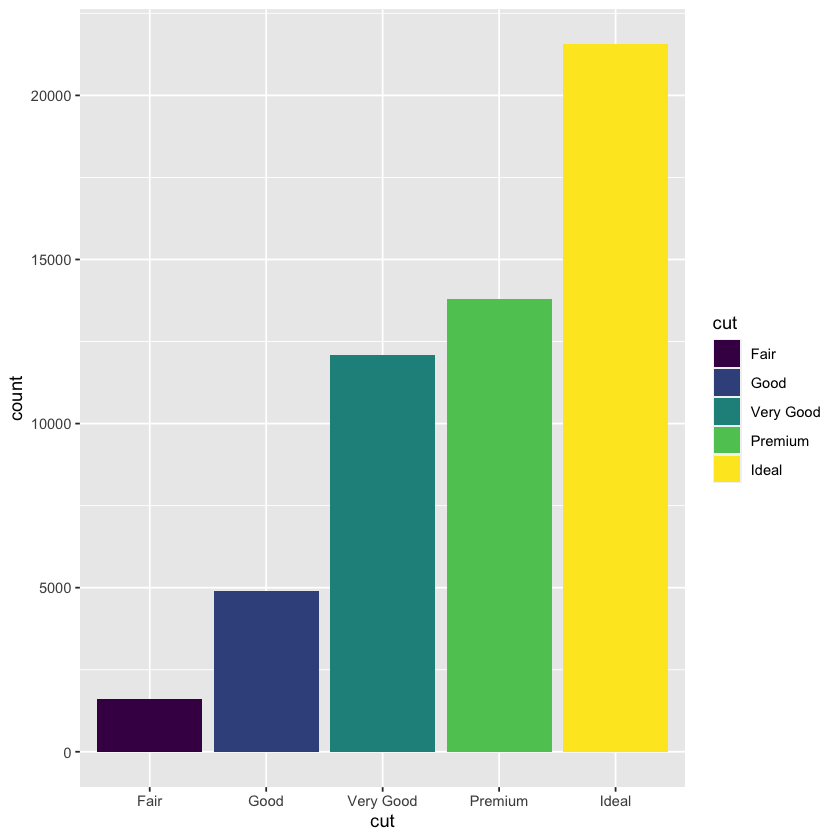

In [32]:
ggplot(data = diamonds) +
geom_bar(mapping = aes(x= cut, color = cut))
ggplot(data = diamonds) +
geom_bar(mapping = aes(x= cut, fill = cut))

`-` 다른 변수 추가해서 각각 얼마나 차지하는지 보이기

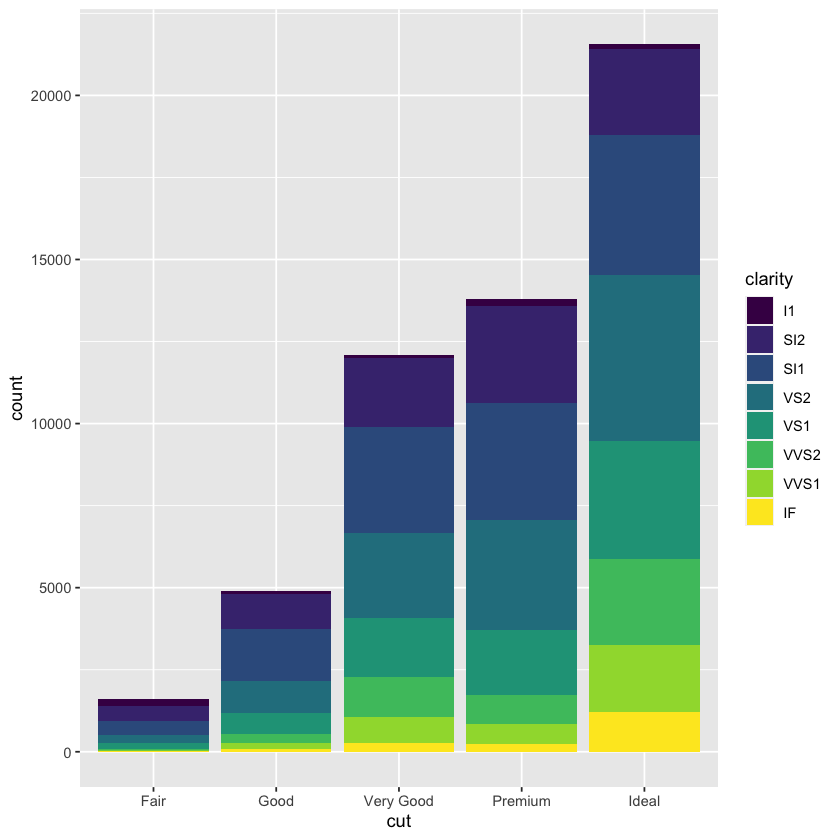

In [33]:
ggplot(data = diamonds) +
geom_bar(mapping = aes(x= cut, fill = clarity))

In [34]:
diamonds$clarity %>% unique

[1] SI2  SI1  VS1  VS2  VVS2 VVS1 I1   IF  
Levels: I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF

`position = 'identity'` : 각 객체를 그래프 문맥에 해당되는 곳에 정확히 배치한다.<br>
다만, 막대그래프에서는 그리 유용하지 않음

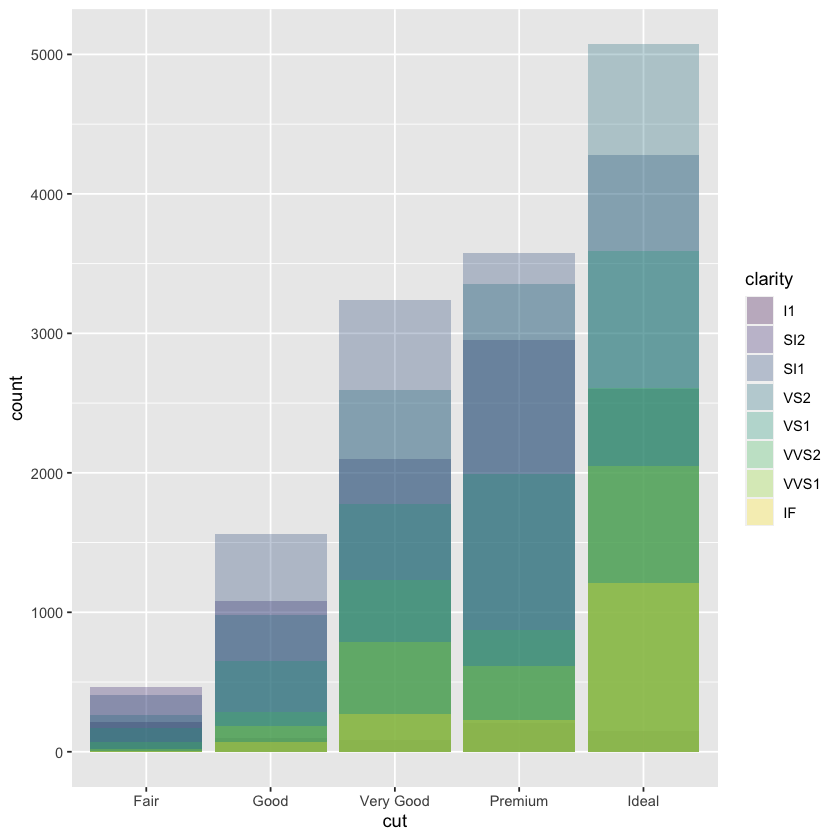

In [35]:
ggplot(
    data = diamonds,
    mapping = aes(x = cut, fill = clarity)
    )+
geom_bar(alpha = 0.3, position = 'identity')

`-` 테두리만 색입히고 막대를 빈공간으로 만드는 것도 가능 

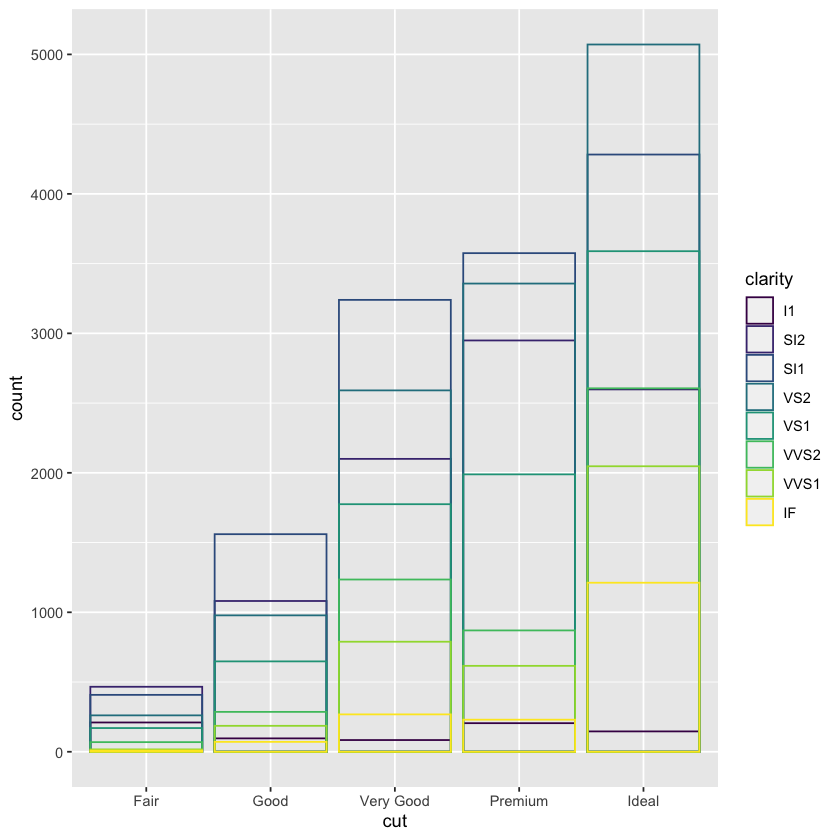

In [36]:
ggplot(
    data = diamonds,
    mapping = aes(x = cut, color = clarity)
    )+
geom_bar(fill = NA, position = 'identity')

`position = 'fill'` : 누적 막대인데 막대 높이를 동일하게 맞춤<br> 
비율 비교에 용이

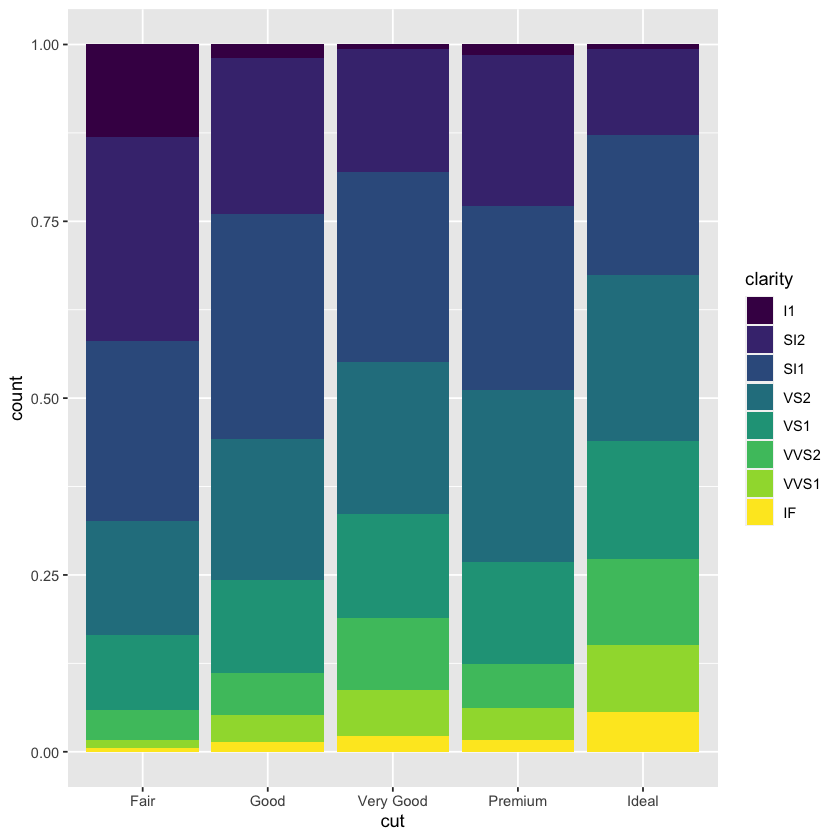

In [37]:
ggplot(data = diamonds) +
geom_bar(
    mapping = aes(x =cut, fill = clarity),
    position = 'fill'
    )

`position = 'dodge'` : 옆으로 쌓기<br>
개별 값들의 비교 용이

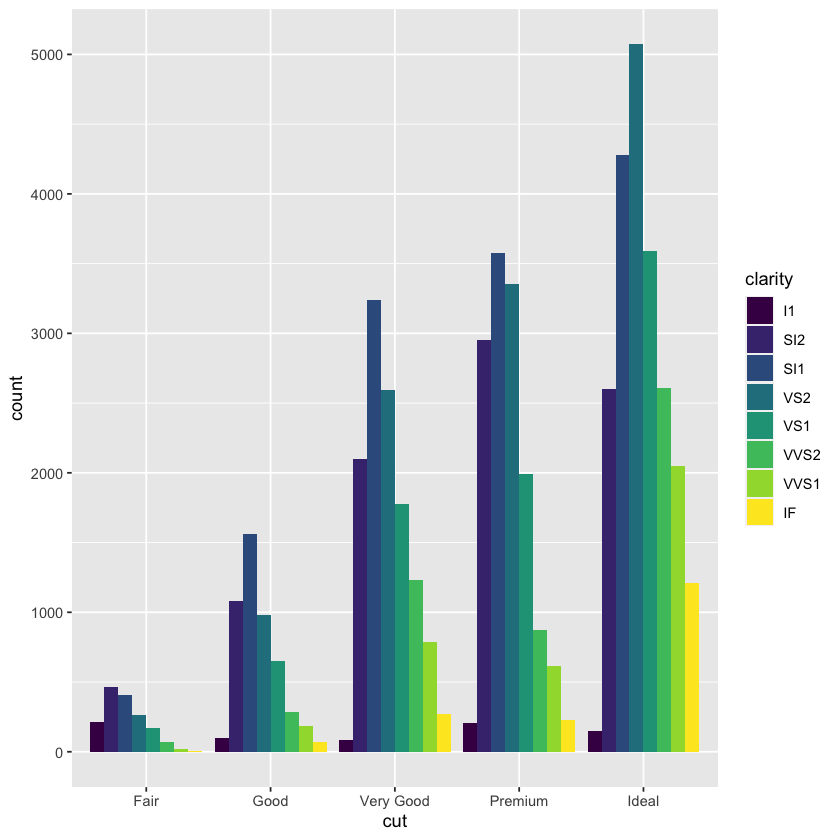

In [38]:
ggplot(data = diamonds) +
geom_bar(
    mapping = aes(x =cut, fill = clarity),
    position = 'dodge'
    )

### jitter

`position = 'jitter'` : 중복된 값 진하게 표시

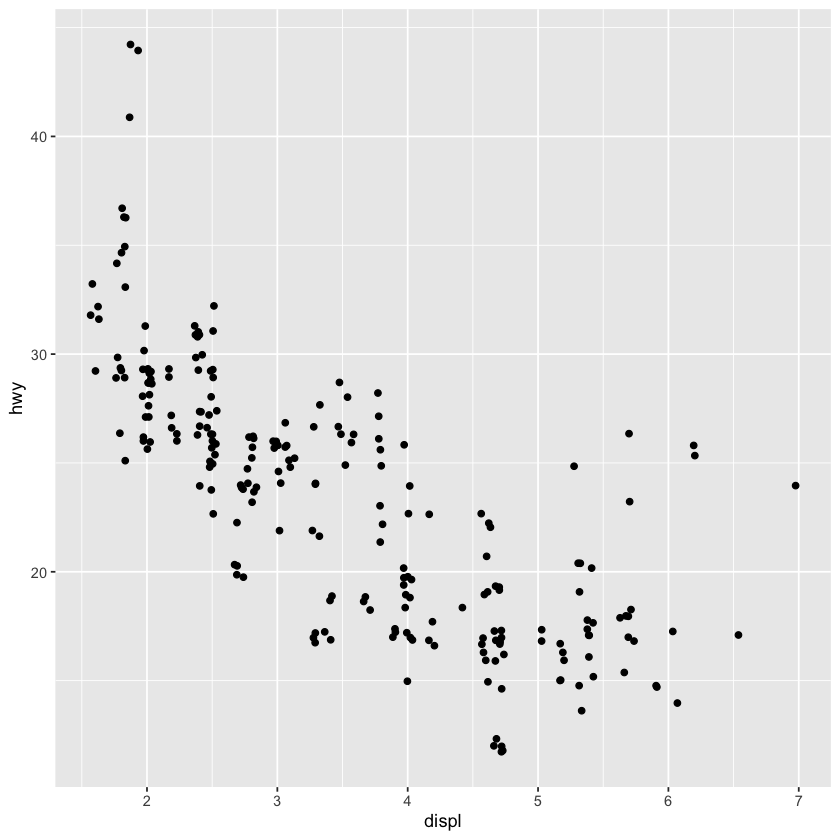

In [39]:
ggplot(data = mpg) +
geom_point(
    mapping = aes(x =displ, y=hwy),
    position = 'jitter'
    )

`coord_flip()` : x축 y축 변경

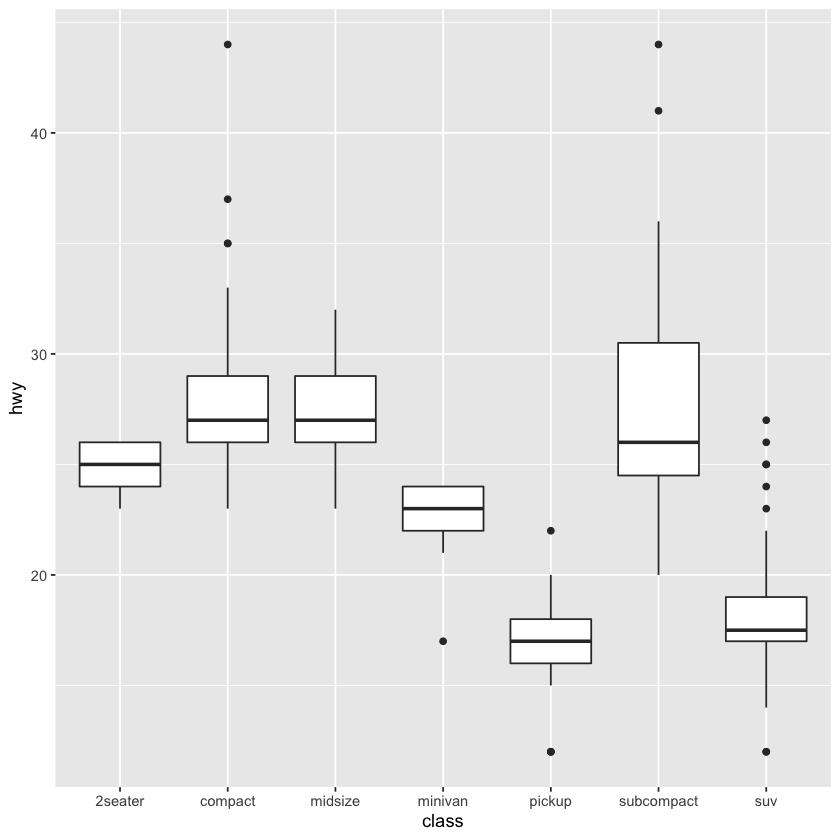

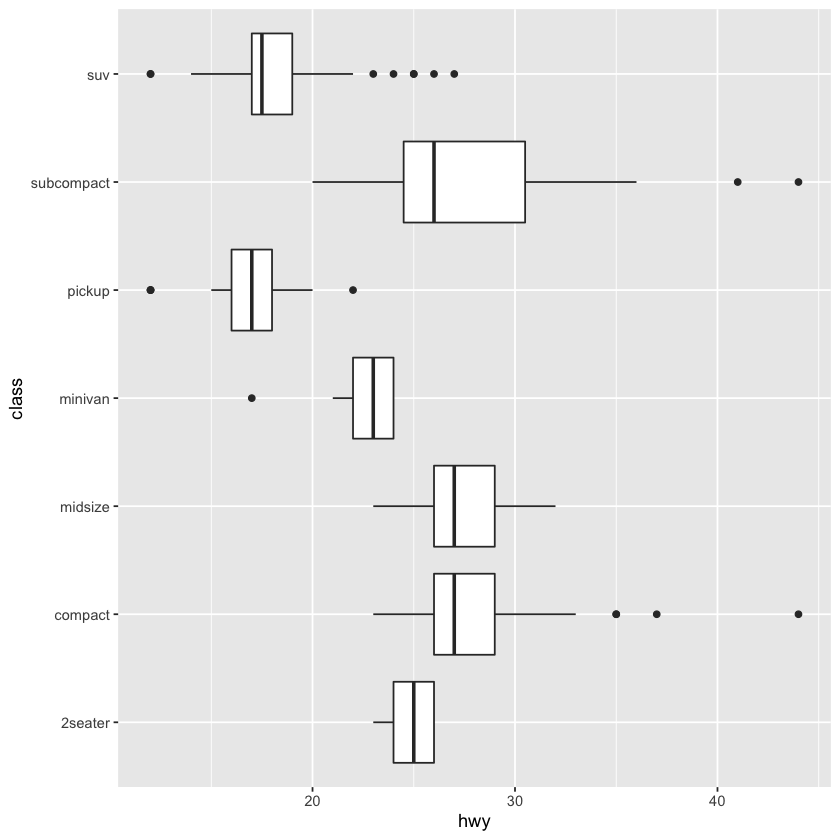

In [40]:
ggplot(data = mpg, mapping = aes(x = class, y= hwy)) +
geom_boxplot()
ggplot(data = mpg, mapping = aes(x = class, y= hwy)) + 
geom_boxplot() +
coord_flip()

## ggplot안의 지도

In [42]:
nz <- map_data('nz')
nz %>% head

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,172.7433,-34.44215,1,1,North.Island,NA
2,172.7983,-34.45562,1,2,North.Island,NA
3,172.8528,-34.44846,1,3,North.Island,NA
4,172.8986,-34.41786,1,4,North.Island,NA
5,172.9593,-34.42503,1,5,North.Island,NA
6,173.0184,-34.39895,1,6,North.Island,NA


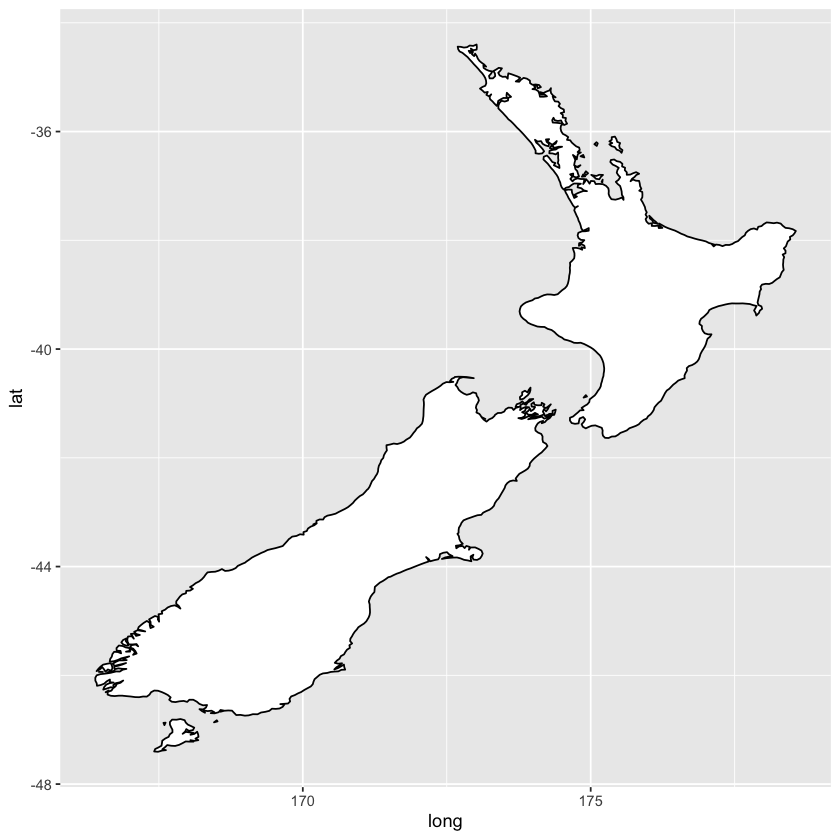

In [43]:
ggplot(nz, aes(long, lat, group = group)) +
geom_polygon(fill = 'white', color = 'black')

- `coord_quickmap()` : 지도에 맞게 가로세로 비율 설정<br>
공간 데이터 plot에서 중요

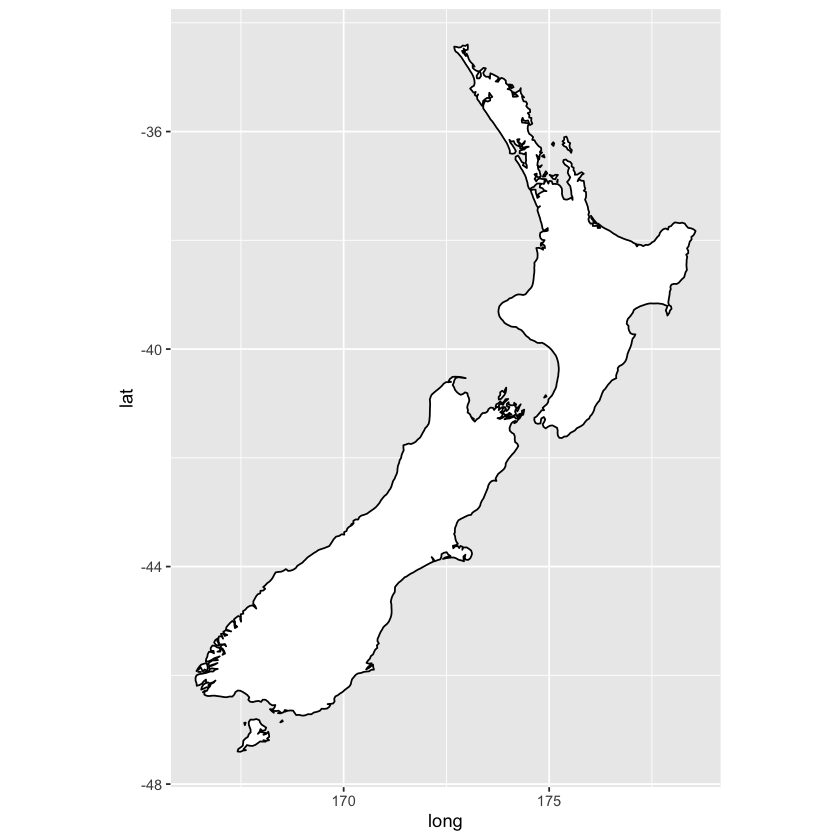

In [44]:
ggplot(nz, aes(long, lat, group = group)) + 
geom_polygon(fill = 'white', color = 'black') +
coord_quickmap()

`labs` : NULL하면 x축이나 y축 이름 안보이게 함<br>
`theme(aspect.ratio)` : 1이면 정사각형 모양, 그 이상은 세로 길어짐, 이하는 가로가 길어짐<br>
`width` : 막대 뚱뚱한 정도<br>
`show.legend` : 범주 표기 여부

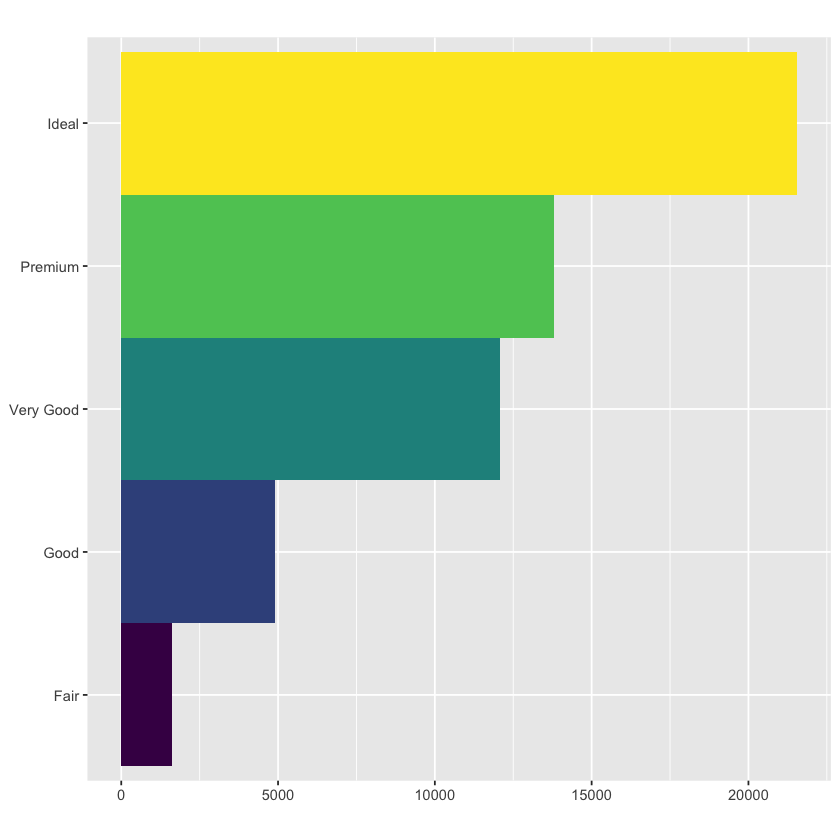

In [45]:
bar <- ggplot(data = diamonds) +
geom_bar(
    mapping = aes(x = cut, fill = cut),
    show.legend = FALSE,
    width = 1
    ) +
theme(aspect.ratio = 1)+
labs(x = NULL, y = NULL)

bar + coord_flip()

- `coord_polar()` : pie 차트로 변경

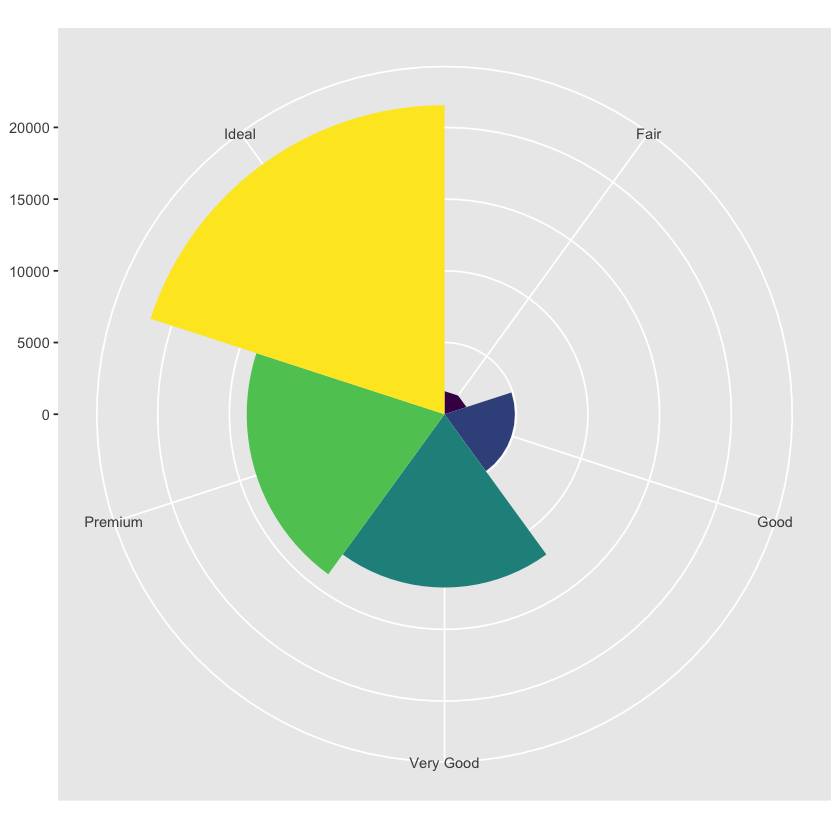

In [46]:
bar + coord_polar()